In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB-Movie-Data.csv")

In [3]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

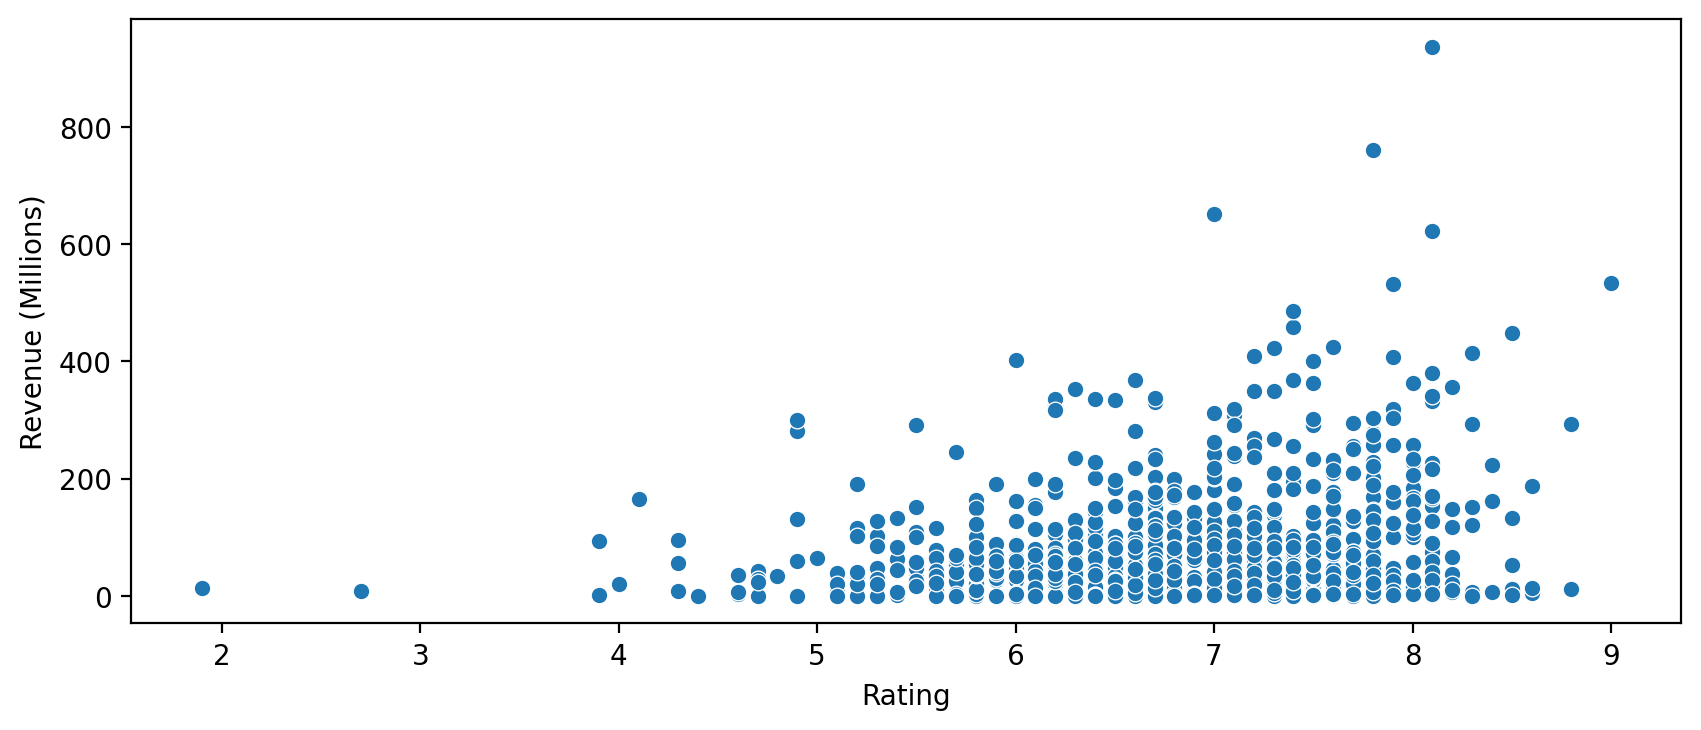

In [6]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df)
#insights : usually low rated movies generate less money and high rated high money, but there are few outliers

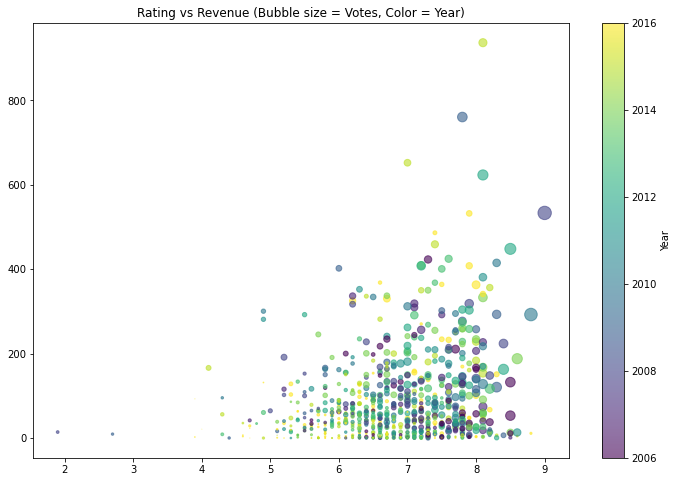

In [7]:
# Bubble chart: Rating vs Revenue with Votes as bubble size
plt.figure(figsize=(12,8))
scatter = plt.scatter(x = df['Rating'], y = df['Revenue (Millions)'], 
                     s=df['Votes']/10000, alpha=0.6, c=df['Year'], cmap='viridis')
plt.colorbar(scatter, label='Year')
plt.title('Rating vs Revenue (Bubble size = Votes, Color = Year)');

<AxesSubplot:xlabel='Rating', ylabel='Count'>

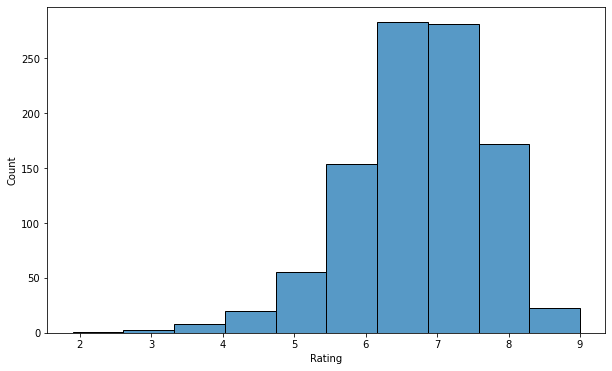

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'],bins=10)

In [9]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [10]:
df['Genre'].str.split(',').explode().value_counts().head(10)

Genre
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Name: count, dtype: int64

<AxesSubplot:xlabel='Genre'>

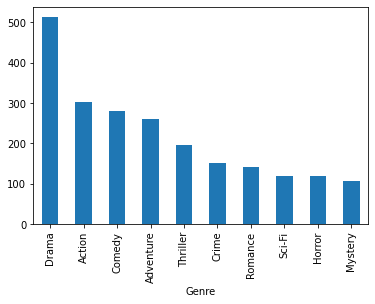

In [11]:
df['Genre'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
#insgihts : drama leads other genres by a big margin

<AxesSubplot:xlabel='Genre'>

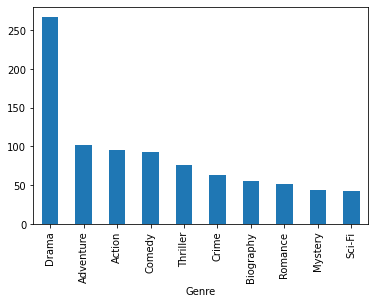

In [12]:
df[df['Rating']>7]['Genre'].str.split(',').explode().value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='Genre'>

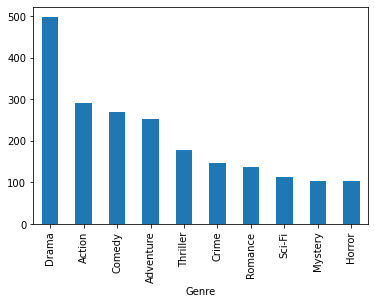

In [13]:
df[df['Rating']>5]['Genre'].str.split(',').explode().value_counts().head(10).plot(kind='bar')

In [14]:
df.groupby('Year')['Revenue (Millions)'].mean()

Year
2006     86.296667
2007     87.882245
2008     99.082745
2009    112.601277
2010    105.081579
2011     87.612258
2012    107.973281
2013     87.121818
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

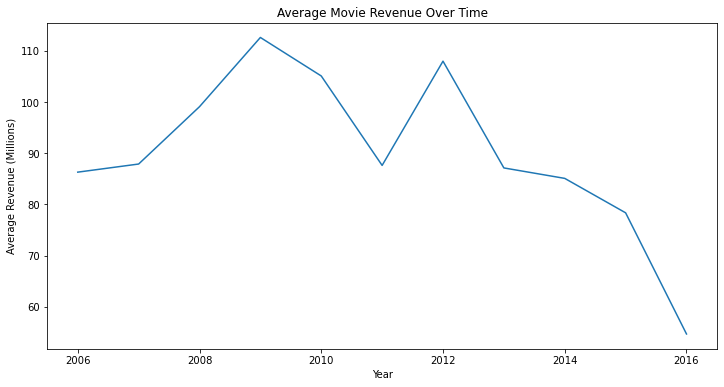

In [15]:
plt.figure(figsize=(12,6))
df.groupby('Year')['Revenue (Millions)'].mean().plot()
plt.title('Average Movie Revenue Over Time')
plt.ylabel('Average Revenue (Millions)')
plt.show()
#insght: as years are passing by, avg revenue generation is getting low

In [16]:
# pip install -q sentence-transformers streamlit

In [17]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [18]:
# Fill missing numeric values
df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].median(), inplace=True)
df["Metascore"].fillna(df["Metascore"].median(), inplace=True)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_12072\656525139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].median(), inplace=True)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_12072\656525139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [19]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [20]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [21]:
# Normalize text columns
for col in ["Title", "Genre", "Description", "Director", "Actors"]:
    df[col] = df[col].astype(str).str.strip()

In [22]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [23]:
# Lowercase genres and director for consistent matching
df["Genre"] = df["Genre"].str.lower()
df["Director"] = df["Director"].str.lower()

In [24]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,james gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",ridley scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [25]:
#metadata vectorization and similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a combined metadata text field
df["metadata"] = (
    df["Genre"].fillna("") + " " +
    df["Director"].fillna("") + " " +
    df["Actors"].fillna("")
)

TF-IDF models work on raw text. Putting related categorical fields into one “document” lets the vectorizer treat director/actor names and genre tokens as textual features. This is a simple and effective way to get a content-based representation without separate pipelines for each field.

TF-IDF (Term Frequency–Inverse Document Frequency):
Converts each movie’s metadata string into a numeric vector where each dimension corresponds to a token (word or bigram). Values encode how important a token is for that movie compared to the whole collection.

min_df=2 — ignore tokens that appear in fewer than 2 documents (movies). This filters out typos or extremely rare names that add noise.

ngram_range=(1,2) — include unigrams (single words) and bigrams (two-word phrases). Bigrams help capture multi-word tokens like "science_fiction" or "tom_cruise" if tokenization preserves them.

stop_words="english" — remove common English words (a, the, is) which carry little discriminative meaning.

In [26]:
tfidf_meta = TfidfVectorizer(min_df=2, ngram_range=(1,2), stop_words="english")
meta_matrix = tfidf_meta.fit_transform(df["metadata"])
#a sparse matrix of shape (n_movies, n_tokens) where each row is the TF-IDF vector for a movie.
#most entries are zero because each movie mentions only a small fraction of all tokens. Sparse matrices are memory-efficient.

# metadata similarity matrix 
meta_sim = cosine_similarity(meta_matrix)
#measures angle between two vectors. It gives a value in [-1,1] (for TF-IDF nonnegative vectors it’s [0,1]) 
#where 1.0 = identical vectors and 0 = orthogonal (no shared tokens).

print("metadata similarity shape:", meta_sim.shape)

metadata similarity shape: (1000, 1000)


For a given movie index i, you can:

sort meta_sim[i] in descending order and pick top indices — these are the most similar movies by metadata (genres, director, actors).

In this hybrid approach we later combine meta_sim with semantic similarity from description embeddings (desc_sim) using a weighted sum.

In [27]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,metadata
0,1,Guardians of the Galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,james gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"action,adventure,sci-fi james gunn Chris Pratt..."
1,2,Prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",ridley scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"adventure,mystery,sci-fi ridley scott Noomi Ra..."


In [28]:
# pip install -q sentence-transformers streamlit

In [41]:
# pip install --upgrade torch

In [48]:
# cell 3: semantic embeddings using Sentence-Transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")   # free, fast, good quality

#Its main job is to take a sentence (or a short paragraph) and convert it into a vector—a fixed list of 384 numbers.
#Before: "The cat sat on the mat" is just text.
#After: [0.123, -0.452, 0.891, ..., 0.045] (a list of 384 numbers)
#This list of numbers is called an embedding or a vector. The key idea is: Sentences with similar meanings will have 
#similar-looking vectors.

In [49]:
descriptions = df["Description"].tolist()
desc_embeddings = model.encode(descriptions, show_progress_bar=True, batch_size=64)
print("desc_embeddings shape:", desc_embeddings.shape)

#What happens internally:
# The model tokenizes each text (splits into word pieces).
# Passes tokens through a transformer encoder (MiniLM).
# Pools outputs (usually mean pooling of token embeddings) to form a single vector per description.
# Returns a NumPy array of shape (n_movies, embedding_dim).

# Example:
# For 1 000 movies, desc_embeddings.shape = (1000, 384)
# Each 384-dimensional vector captures the semantic essence of a movie’s description.
# Parameters:
# show_progress_bar=True → displays progress as it processes batches.
# batch_size=64 → encodes 64 descriptions at once for efficiency (can adjust based on GPU/CPU memory).

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

desc_embeddings shape: (1000, 384)


In [50]:
len(desc_embeddings[0])

384

In [51]:
# description similarity matrix
desc_sim = cosine_similarity(desc_embeddings)
print("description similarity shape:", desc_sim.shape)

#Creates a (1000, 1000) semantic similarity matrix, where each cell desc_sim[i, j] 
#measures how semantically similar two movie descriptions are.

description similarity shape: (1000, 1000)


Goes beyond keywords: TF-IDF might fail if two descriptions use different words (“AI robot” vs. “synthetic android”), but embeddings will still recognize them as similar.

Enables natural language search: You can embed a user’s free-text query and compare it to these same desc_embeddings to find the most semantically related movies.

Forms the “semantic layer” of your hybrid recommender — later we will combined  (desc_sim) with the metadata similarity (meta_sim) to create a richer, smarter recommendation signal.

In [52]:
# cell 4: hybrid similarity
alpha = 0.45  
hybrid_sim = alpha * meta_sim + (1 - alpha) * desc_sim

#alpha is a weighting factor that decides how much importance you want to give to each similarity source:
#meta_sim → similarity derived from structured data (genre, actors, etc.)
#desc_sim → similarity derived from descriptions (semantic meaning)
#Here:
#alpha = 0.45 → 45% weight to metadata similarity
#1 - alpha = 0.55 → 55% weight to semantic similarity

#WE can tune this hyperparameter depending on what we care about:
#If we want recommendations that match genres, actors, directors more closely → increase alpha
#If we want recommendations that match the story or plot meaning more closely → decrease alpha
#This is similar to balancing structured vs unstructured knowledge.


# helper: mapping title -> index (lowercased for robustness)
title_to_idx = {t.lower(): i for i, t in enumerate(df["Title"].tolist())}

#This creates a dictionary mapping:
# Key: movie title (in lowercase for case-insensitivity)
# Value: index of that movie in the DataFrame / similarity matrix
# Example:
# {'inception': 0, 'interstellar': 1, 'the dark knight': 2, ...}
# Later, when a user types a movie name like "Inception":
# idx = title_to_idx['inception']
# to find its row/column in the hybrid_sim matrix — which is essential to fetch similar movies.

In [53]:
# cell 5: recommendation helper functions

def recommend_by_title(title, top_n = 6, sim_matrix = hybrid_sim):
    """
    Given a movie title (case-insensitive), return top_n similar movies.
    First result is input movie, so we skip it and return next top_n.
    """
    idx = title_to_idx.get(title.lower())
    if idx is None:
        raise ValueError(f"Title '{title}' not found.")
    sims = sim_matrix[idx]
    top_idx = np.argsort(sims)[::-1]  # descending
    # skip itself
    top_idx = [i for i in top_idx if i != idx][:top_n]
    return df.iloc[top_idx].reset_index(drop=True)


#This looks up the movie’s index (from our earlier dictionary).
#Example:
#title = "Inception"
#idx = 0
#If the movie isn’t found:
#if idx is None:
#    raise ValueError(f"Title '{title}' not found.")
#This prevents errors by stopping the code gracefully with a clear message.

#sims = sim_matrix[idx]
#This gives you a list/array of similarity scores between the selected movie and all others.
#Example: [.80, 0.87, 0.75, 0.65, 1, 0.23,...] where 1.0 is similarity with itself.

#top_idx = np.argsort(sims)[::-1]
#np.argsort() gives indices that would sort the list.
#[::-1] reverses it to descending order → most similar first.

#top_idx = [i for i in top_idx if i != idx][:top_n]
#We remove the input movie’s own index and then take the top n (default: 6).
#So, if you asked for “Inception,” you won’t get “Inception” again.

#return df.iloc[top_idx].reset_index(drop=True)
#Fetches those movies from the DataFrame and resets the row index for clean display.

In [ ]:
# Natural-language query -> embed -> find top matches using description embeddings
def recommend_by_query(query, top_n=6):
    q_emb = model.encode([query])
    q_sim = cosine_similarity(q_emb, desc_embeddings)[0]
    # you may combine with metadata by e.g. computing average meta similarity to top candidates
    top_idx = np.argsort(q_sim)[::-1][:top_n]
    return df.iloc[top_idx].reset_index(drop=True)

This one is the LLM-enhanced / semantic part — the magic of natural language understanding ✨

1️⃣ Input:
query = "show me sci-fi thrillers with space exploration"

Instead of giving a movie title, the user gives a natural language request.

2️⃣ Encode the query into an embedding:
q_emb = model.encode([query])


The same SentenceTransformer model used earlier turns this text query into a vector representation (semantic embedding).

3️⃣ Compare with all movie descriptions:
q_sim = cosine_similarity(q_emb, desc_embeddings)[0]


We compute cosine similarity between the query vector and every movie’s description vector.

The result (q_sim) is a list of similarity scores, one for each movie.

So now, movies whose descriptions best match your query’s meaning get higher scores.

4️⃣ Pick top matches:
top_idx = np.argsort(q_sim)[::-1][:top_n]


Same as before — we take indices of top n movies with highest semantic similarity.

5️⃣ Return final movies:
return df.iloc[top_idx].reset_index(drop=True)


Displays a neat DataFrame of best matches.

✅ Example:

recommend_by_query("thrillers with strong female leads")


→ might return movies like Gone Girl, Lucy, The Girl on the Train, etc.

In [31]:
# cell 6: explanation generator (template)
def explain_recommendation(source_title, rec_row):
    """
    source_title: movie the user started from or query text
    rec_row: a DataFrame row (pandas Series) of recommended movie
    """
    reasons = []
    # genre overlap
    src_genres = set(df.loc[title_to_idx[source_title.lower()],"Genre"].split(","))
    rec_genres = set(str(rec_row["Genre"]).split(","))
    common_genres = src_genres.intersection(rec_genres)
    if common_genres:
        reasons.append(f"shares genre(s): {', '.join([g.title() for g in common_genres])}")
    # director/actor heuristic
    src_actors = set(df.loc[title_to_idx[source_title.lower()],"Actors"].split(","))
    rec_actors = set(str(rec_row["Actors"]).split(","))
    common_actors = src_actors.intersection(rec_actors)
    if common_actors:
        reasons.append(f"has overlapping cast: {', '.join([a.strip() for a in common_actors])}")
    # rating/votes signal
    reasons.append(f"rated {rec_row['Rating']} on IMDB with {int(rec_row['Votes']):,} votes")
    return "Recommended because " + "; ".join(reasons) + "."

# Example usage:
sample_recs = recommend_by_title("Prometheus", top_n=3)
for _, row in sample_recs.iterrows():
    print(row["Title"], "-", explain_recommendation("Prometheus", row))


The Martian - Recommended because shares genre(s): Adventure, Sci-Fi; rated 8.0 on IMDB with 556,097 votes.
Transformers: Dark of the Moon - Recommended because shares genre(s): Adventure, Sci-Fi; rated 6.3 on IMDB with 338,369 votes.
Coherence - Recommended because shares genre(s): Mystery, Sci-Fi; rated 7.2 on IMDB with 66,265 votes.


Take the genre list of the movie the user searched for
Take the genre list of the recommended movie
Convert both to sets (because sets make comparison easy)
Find genres that appear in both

Example:
Prometheus genres → Adventure, Mystery, Sci-Fi
Recommended movie → Action, Sci-Fi
Common = Sci-Fi

If they share any genres:
reasons.append("shares genre(s): Sci-Fi")